<h1>A Deep Dive into the Open Food Facts Dataset</h1>

<p>It has never been more important to know how the food we eat affects our health and the planet, since the food comes from a lot of different cultures.</p>

<p>The Open Food Facts database may be described as the best collection of data about any food products from around the world, produced by <strong>20,000+</strong> dedicated volunteer workers.</p>

<p>In this context, an important indicator for assessing the environmental impact of food products is the <a href="https://en.wikipedia.org/wiki/Eco-score#:~:text=The%20Eco%2Dscore%2C%20like%20the,choices%20when%20making%20their%20purchases."><strong>eco-score</strong></a><strong>. </strong>It offers a measurable indicator of sustainability that helps consumers make more ecological choices when making their purchases.</p>

<img alt="" width="646" height="274" loading="lazy" role="presentation" src="https://miro.medium.com/v2/resize:fit:646/1*75jG-paKqg4iOa53mj2wTg.png">

<p>We use data analysis to explore the Open Food Facts dataset and gain insights into eco-score coverage.
</p>

<h1>Data Collection and Preparation</h1>

<p>Our main source of data is a CSV file (readable with LibreOffice, Excel and many other spreadsheet software) that we downloaded from the <a href="https://world.openfoodfacts.org/data">Open Food Facts data website</a>.</p>

# Columns Included in the Dataset
The dataset includes a comprehensive set of 206 columns, so we will try to deal with only the columns that are important in our research.

<h1>Loading the Data into a DataFrame</h1>

## Step 1: Import Necessary Libraries
In this step, we will import all the necessary Python libraries that will be used throughout our data exploration and analysis. This includes libraries for data manipulation, analysis, and visualisation.

In [3]:
import pandas as pd # data manipulation and analysis
import seaborn as sns # data visualisation
import matplotlib.pyplot as plt # data visualisation
%matplotlib inline
#Enable inline display of matplotlib plots in the notebook.

## Step 2: Load the Dataset into a DataFrame
Here, we'll load our dataset from its source into a pandas DataFrame, we named our data <code>df</code>:</p>

In [5]:
df = pd.read_csv("openfoodfacts.csv", sep='\t', encoding='utf-8', on_bad_lines='skip', low_memory=False)

## Step 3: Preview the Data
After loading the data, we'll preview the first few rows of our dataset using the `head()` function. We'll also use the `describe()` function to get a statistical summary of the numerical columns. This initial peek into the data helps us understand its structure, content, and the types of data we're dealing with.

In [8]:
pd.set_option('display.max_columns', None)
df.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,last_modified_by,last_updated_t,last_updated_datetime,product_name,abbreviated_product_name,generic_name,quantity,packaging,packaging_tags,packaging_en,packaging_text,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,origins_en,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,ingredients_tags,ingredients_analysis_tags,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,serving_quantity,no_nutrition_data,additives_n,additives,additives_tags,additives_en,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,food_groups,food_groups_tags,food_groups_en,states,states_tags,states_en,brand_owner,ecoscore_score,ecoscore_grade,nutrient_levels_tags,product_quantity,owner,data_quality_errors_tags,unique_scans_n,popularity_tags,completeness,last_image_t,last_image_datetime,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,unsaturated-fat_100g,monounsaturated-fat_100g,omega-9-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,omega-6-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,added-sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,erythritol_100g,fiber_100g,soluble-fiber_100g,insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,added-salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g,sulphate_100g,nitrate_100g,acidity_100g
0,00000000000000225,http://world-en.openfoodfacts.org/product/0000...,nutrinet-sante,1623855208,2021-06-16T14:53:28Z,1692101569,2023-08-15T12:12:49Z,digg,1.707748e+09,2024-02-12T14:25:39Z,jeunes pousses,NaN,NaN,NaN,NaN,NaN,NaN,NaN,endives,endives,"Aliments et boissons à base de végétaux, Alime...","en:plant-based-foods-and-beverages,en:plant-ba...","Plant-based foods and beverages,Plant-based fo...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:france,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,NaN,Fruits and vegetables,Vegetables,en:vegetables,"en:fruits-and-vegetables,en:vegetables

### Statistical Summary of Dataset

The `df.describe()` method offers a comprehensive statistical overview of the numerical columns within our dataset. Here is a breakdown of key insights and implications derived from this summary:

In [10]:
df.describe()

,created_t,last_modified_t,last_updated_t,nova_group,ecoscore_score,product_quantity,unique_scans_n,completeness,last_image_t,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,unsaturated-fat_100g,monounsaturated-fat_100g,omega-9-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,omega-6-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,added-sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,erythritol_100g,fiber_100g,soluble-fiber_100g,insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,added-salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g,sulphate_100g,nitrate_100g,acidity_100g
count,3.361648e+06,3.361648e+06,3.339167e+06,898580.000000,830774.000000,9.987460e+05,1.074204e+06,3.361644e+06,2.780864e+06,3.471960e+05,2.479903e+06,2.527970e+06,1245.000000,2.502831e+06,2.417428e+06,42.000000,15.000000,23.000000,27.000000,40.000000,30.000000,71.000000,35.000000,265.000000,88.000000,21.000000,24.000000,3.000000e+01,36.000000,141.000000,54402.000000,193.000000,54356.000000,3704.000000,1111.000000,1275.000000,242.000000,390.000000,623.000000,243.000000,17.000000,22.000000,133.000000,7.000000e+00,97.000000,27.000000,11.000000,1.900000e+01,2.946750e+05,303274.000000,2.505901e+06,2.448394e+06,23498.000000,257.000000,144.000000,105.000000,1530.000000,101.000000,258.000000,740.000000,6170.000000,142.000000,1.167504e+06,3717.000000,3411.000000,2.507273e+06,89.000000,102.000000,55.000000,2.176940e+06,95.000000,2.176938e+06,30787.000000,220578.000000,107.000000,3.295100e+04,7104.000000,2042.000000,2.247310e+05,27953.000000,27612.000000,26304.000000,20312.000000,13038.000000,8834.000000,1.795100e+04,2025.000000,8604.000000,267.000000,959.000000,123501.000000,1636.000000,307843.000000,16535.000000,295540.000000,18587.000000,12878.000000,5194.000000,5104.000000,710.000000,3452.000000,414.000000,528.000000,3234.000000,1909.000000,360.000000,661.000000,13878.000000,1125.000000,12672.000000,974614.000000,327.000000,8008.000000,9.000000,481.000000,12652.000000,1.128293e+06,2.00000,8.000000,11.000000,172.000000,1713.000000,68.000000,120.000000,79.000000,117.000000,121.000000,21.000000
mean,1.607940e+09,1.659338e+09,1.710232e+09,3.327707,49.107142,8.078997e+04,2.939371e+00,4.293382e-01,1.628252e+09,4.748868e+12,4.605056e+10,6.757563e+11,396.940795,3.738185e+05,3.862770e+05,1.218269,3.657098,12.136063,9.617477,22.374923,7.589153,7.939525,6.457

### Overview of Columns

- **Timestamps (`created_t` and `last_modified_t`):** Indicate the creation and last modification times of products, represented as Unix timestamps.

- **Additives (`additives_n`):** Show the count of additives per product, with an average around 2. 

- **Ecoscore (`ecoscore_score`):** This environmental impact score averages at approximately 49.107, with scores ranging from -30 to 125. 

### Key Takeaways

- **Data Completeness:** There's noticeable data missing in several columns, notably in `additives_n`, and `ecoscore_score`, which requires addressing through data cleaning processes.

- **Environmental Insights:** The range of `ecoscore_score`, from negative to highly positive scores, underscores the wide disparities in the environmental impacts of products. This variation opens up opportunities for in-depth exploration of the factors influencing sustainability.

# Data Cleaning and Formatting Strategy

Given the extensive dataset from Open Food Facts, our initial assessment has highlighted a need for meticulous data cleaning and formatting to ensure the reliability and accuracy of our analysis.

In [13]:
missing_percentage = df.isnull().mean() * 100
# Sort the percentages in descending order
missing_percentage_sorted = missing_percentage.sort_values(ascending=False)
# Print the sorted percentages
print("Columns with the highest percentages of missing values:")
print(missing_percentage_sorted)

Columns with the highest percentages of missing values:
cities                     99.999970
additives                  99.999970
allergens_en               99.999970
nutrition-score-uk_100g    99.999941
elaidic-acid_100g          99.999792
                             ...    
created_datetime            0.000000
created_t                   0.000000
url                         0.000000
last_modified_datetime      0.000000
code                        0.000000
Length: 206, dtype: float64


### High Missing Values
- **Columns with >70% Missing Data**: `cities`, `additives`, `allergens_en`, `nutrition-score-uk_100g`, and others exhibit exceedingly high levels of missing data. Given their limited availability and potential minimal impact on our analysis, these columns will be removed.

In [15]:
columns_to_drop = ['cities', 'additives', 'allergens_en', 'nutrition-score-uk_100g', 'created_datetime', 'last_modified_datetime', 'last_updated_datetime', 'last_image_datetime', 'elaidic-acid_100g', 'glycemic-index_100g', 'chlorophyl_100g', 'water-hardness_100g', 'erucic-acid_100g', 'caproic-acid_100g', 'gamma-linolenic-acid_100g', 'nervonic-acid_100g', 'lignoceric-acid_100g', 'categories_tags', 'acidity_100g', 'dihomo-gamma-linolenic-acid_100g', 'caprylic-acid_100g', 'cerotic-acid_100g', 'mead-acid_100g', 'capric-acid_100g', 'montanic-acid_100g', 'myristic-acid_100g', 'stearic-acid_100g', 'melissic-acid_100g', 'lauric-acid_100g', 'butyric-acid_100g', 'nucleotides_100g', 'beta-glucan_100g', 'palmitic-acid_100g', 'carnitine_100g', 'behenic-acid_100g', 'casein_100g', 'added-salt_100g', 'gondoic-acid_100g', 'maltose_100g', 'serum-proteins_100g', 'fructose_100g', 'beta-carotene_100g', 'sulphate_100g', 'inositol_100g', 'nitrate_100g', 'oleic-acid_100g', 'unsaturated-fat_100g', 'erythritol_100g', 'glucose_100g', 'choline_100g', 'omega-9-fat_100g', 'eicosapentaenoic-acid_100g', 'arachidonic-acid_100g', 'sucrose_100g', 'maltodextrins_100g', 'arachidic-acid_100g', 'silica_100g', 'collagen-meat-protein-ratio_100g', 'taurine_100g', 'docosahexaenoic-acid_100g', 'chromium_100g', 'carbon-footprint_100g', 'molybdenum_100g', 'linoleic-acid_100g', 'ph_100g', 'fluoride_100g', 'starch_100g', 'bicarbonate_100g', 'omega-6-fat_100g', 'fruits-vegetables-nuts-dried_100g', 'energy-from-fat_100g', 'alpha-linolenic-acid_100g', 'lactose_100g', 'chloride_100g', 'phylloquinone_100g', 'caffeine_100g', 'biotin_100g', 'vitamin-k_100g', 'iodine_100g', 'insoluble-fiber_100g', 'selenium_100g', 'omega-3-fat_100g', 'soluble-fiber_100g', 'manganese_100g', 'copper_100g', 'polyols_100g', 'vitamin-e_100g', 'cocoa_100g', 'pantothenic-acid_100g', 'folates_100g', 'carbon-footprint-from-meat-or-fish_100g', 'fruits-vegetables-nuts-estimate_100g', 'zinc_100g', 'vitamin-b9_100g', 'fruits-vegetables-nuts_100g', 'phosphorus_100g', 'vitamin-b12_100g', 'magnesium_100g', 'vitamin-b6_100g', 'added-sugars_100g', 'abbreviated_product_name', 'packaging_text', 'vitamin-pp_100g', 'vitamin-b2_100g', 'vitamin-b1_100g', 'alcohol_100g', 'vitamin-d_100g', 'no_nutrition_data', 'polyunsaturated-fat_100g', 'monounsaturated-fat_100g', 'first_packaging_code_geo', 'owner', 'cities_tags', 'potassium_100g', 'origins_en', 'origins_tags', 'origins', 'data_quality_errors_tags', 'traces', 'generic_name', 'emb_codes_tags', 'emb_codes', 'traces_en', 'traces_tags', 'manufacturing_places_tags', 'manufacturing_places', 'vitamin-a_100g', 'vitamin-c_100g', 'brand_owner', 'trans-fat_100g', 'iron_100g', 'cholesterol_100g', 'calcium_100g', 'energy-kj_100g', 'packaging_en', 'packaging_tags', 'additives_en', 'serving_quantity', 'nova_group', 'image_ingredients_small_url', 'image_ingredients_url', 'ingredients_tags', 'fruits-vegetables-nuts-estimate-from-ingredients_100g', 'labels_en', 'labels_tags', 'product_quantity', 'brands_tags', 'categories_en', 'countries_tags', 'countries_en', 'food_groups_tags', 'states', 'states_tags', 'states_en', 'completeness', 'last_image_t', 'main_category', 'image_small_url', 'image_nutrition_small_url', 'energy_100g', 'carbohydrates_100g', 'fiber_100g', 'proteins_100g', 'sodium_100g', 'nutrition-score-fr_100g']
df.drop(columns=columns_to_drop, inplace=True)

### Moderate to High Missing Values
- **Strategic Imputation for Eco-Score Columns**: The `ecoscore_score` and `ecoscore_grade` columns are pivotal for our environmental impact analysis. Missing values in `ecoscore_score` will be imputed with `-1`, indicating an absence of data, while `ecoscore_grade` will be filled with 'Unknown'.

In [17]:
df['ecoscore_score']=df['ecoscore_score'].fillna(-1)
df['ecoscore_grade']=df['ecoscore_grade'].fillna('unknown')

- **Filling Other Key Columns**: For columns like `categories`, `brands`, `product_name` and `food_groups`, which have a considerable impact on our analysis but contain missing values, we'll impute missing data with 'Unknown'.

In [19]:
key_columns = ['categories', 'brands', 'product_name', 'food_groups']
for column in key_columns:
    df[column].fillna('unknown')

## Data Formatting and Normalisation

To ensure consistency and facilitate analysis, several formatting steps will be applied:

### Date Formatting
- **Unix Timestamps to Datetime**: `created_t` and `last_modified_t` will be converted from Unix timestamps to a more interpretable datetime format.

In [21]:
df['created_t'] = pd.to_datetime(df['created_t'], unit='s')
df['last_modified_t'] = pd.to_datetime(df['last_modified_t'], unit='s')
df['last_updated_t'] = pd.to_datetime(df['last_updated_t'], unit='s')

### Text Standardisation
- **Case Normalisation**: All textual data, especially in columns like `product_name`, `brands`, `categories` and `food_groups`, will be converted to lowercase to maintain uniformity.

In [23]:
text_columns = ['product_name', 'brands', 'categories', 'food_groups']
for column in text_columns:
    df[column] = df[column].str.lower()

In [24]:
missing_percentage = df.isnull().mean() * 100
missing_percentage_sorted = missing_percentage.sort_values(ascending=False)
print("Columns with the highest percentages of missing values:")
print(missing_percentage_sorted)

Columns with the highest percentages of missing values:
purchase_places              94.017547
allergens                    91.223561
packaging                    88.705748
stores                       86.353925
additives_tags               83.631689
serving_size                 76.470261
ingredients_text             70.951242
additives_n                  70.950944
labels                       70.587492
ingredients_analysis_tags    69.105897
quantity                     68.458030
popularity_tags              68.251911
unique_scans_n               68.045316
nutriscore_score             66.436284
food_groups_en               64.431463
food_groups                  64.431434
nutrient_levels_tags         63.521315
main_category_en             56.097486
categories                   56.097337
image_nutrition_url          45.948535
brands                       43.829306
salt_100g                    35.241881
saturated-fat_100g           28.088009
sugars_100g                  27.166854
energy-k

# Refined Data Cleaning Strategy for Remaining Missing Values

As part of our data cleaning process, we address missing values in both textual and numerical columns. Our strategy involves imputing these missing values with placeholders that indicate an absence of data while allowing us to retain these entries for analysis.

## Imputation for Textual Data

For columns containing textual information, we encounter missing values that are crucial for maintaining comprehensive records. To handle these gaps, we impute the missing entries with the placeholder 'Unknown'. 

In [26]:
# Imputation for textual data with 'Unknown'
columns_text_unknown = ['purchase_places', 'allergens', 'stores', 'packaging', 'labels', 'additives_tags', 'countries', 'creator','ingredients_text','serving_size','pnns_groups_1','pnns_groups_2','quantity', 'last_modified_by', 'product_name', 'brands', 'categories', 'ingredients_analysis_tags', 'nutriscore_grade', 'food_groups', 'food_groups_en', 'nutrient_levels_tags', 'popularity_tags', 'main_category_en', 'image_url', 'image_nutrition_url']
df[columns_text_unknown]=df[columns_text_unknown].fillna('unknown')

## Imputation for Numerical Columns

For numerical columns that contain missing data, we apply a similar imputation strategy, using a placeholder value that signifies missing information. In this case, we choose to impute with -1, a value that falls outside the typical range of these columns, ensuring clear differentiation between imputed and actual values.

In [28]:
# For numerical columns
columns_num_unknown= ['additives_n', 'last_updated_t', 'nutriscore_score', 'unique_scans_n', 'energy-kcal_100g', 'fat_100g', 'saturated-fat_100g', 'sugars_100g', 'salt_100g']
df[columns_num_unknown]=df[columns_num_unknown].fillna('-1')

In [29]:
df.isnull().sum()

code                         0
url                          0
creator                      0
created_t                    0
last_modified_t              0
last_modified_by             0
last_updated_t               0
product_name                 0
quantity                     0
packaging                    0
brands                       0
categories                   0
labels                       0
purchase_places              0
stores                       0
countries                    0
ingredients_text             0
ingredients_analysis_tags    0
allergens                    0
serving_size                 0
additives_n                  0
additives_tags               0
nutriscore_score             0
nutriscore_grade             0
pnns_groups_1                0
pnns_groups_2                0
food_groups                  0
food_groups_en               0
ecoscore_score               0
ecoscore_grade               0
nutrient_levels_tags         0
unique_scans_n               0
populari

In [36]:
len(df.keys())

41

Finally! No missing values. Now, we can dive into our analysis.

In [32]:
df_subset = df.head(100000)
df_subset.to_excel("newDataFrame.xlsx", index=False)

# Analysis of Food Products Dataset

Our analysis begins by examining the overall landscape of the food products dataset, with a specific focus on understanding the scope and scale of the data we're working with. 

## Total Count of Food Products

The first step in our analysis is to determine the total number of food products included in our dataset. 

In [172]:
total_products = df.shape[0]
print(f"Total number of food products in the dataset: {total_products}")

Total number of food products in the dataset: 3361648


The dataset comprises a total of **3,361,648 food products**, indicating a huge volume of data for analysis. 

Moving forward, our analysis will leverage this extensive dataset to explore specific areas of interest, such as:
- The availability and distribution of eco-scores across various food groups.
- Detailed examination of eco-score parameters, including packaging data
- Comparative analysis of food products with and without eco-scores, aiming to highlight potential areas for improvement in environmental impact assessments.

This initial count sets the stage for a deeper dive into the dataset, enabling targeted investigations that can contribute to more informed consumer choices and encourage sustainable practices within the food industry.

# Eco-Score Availability Analysis

Understanding the distribution of eco-scores within our dataset is essential for assessing the environmental impact of food products. This analysis focuses on quantifying the number of products that have been assigned an eco-score and those that have not.

## Total Number of Products With and Without Eco-Scores

To gain insight into the eco-score coverage, we calculate both the absolute numbers and the percentage of products with an assigned eco-score.

In [184]:
# Calculate the total number of products with an assigned Eco-Score
products_with_eco_score = (df['ecoscore_score'] != -1).sum()

# Calculate the total number of products without an assigned Eco-Score
products_without_eco_score = (df['ecoscore_score'] == -1).sum()

# Calculate the percentage of products with an assigned Eco-Score
total_products = len(df)
eco_score_percentage = (products_with_eco_score / total_products) * 100

# Calculate the percentage of products without  an assigned Eco-Score
no_eco_score_percentage = (products_without_eco_score / total_products) * 100

In [186]:
print(f"Total number of products with an Eco-Score: {products_with_eco_score}")
print(f"Total number of products without an Eco-Score: {products_without_eco_score}")
print(f"Percentage of products with an Eco-Score: {eco_score_percentage:.2f}%")
print(f"Percentage of products without an Eco-Score: {no_eco_score_percentage:.2f}%")

Total number of products with an Eco-Score: 829801
Total number of products without an Eco-Score: 2531847
Percentage of products with an Eco-Score: 24.68%
Percentage of products without an Eco-Score: 75.32%


## Total Number of Products With and Without Packaging

In [207]:
# Count products with and without packaging data
with_packaging = df[df['packaging'] != 'unknown'].shape[0]  
without_packaging = df[df['packaging'] == 'unknown'].shape[0]

packaging_percentage= (with_packaging / total_products) * 100

no_packaging_percentage= (without_packaging / total_products) * 100


print(f"Products with packaging data: {with_packaging}")
print(f"Products without packaging data: {without_packaging}")
print(f"Percentage of products with Packaging: {packaging_percentage:.2f}%")
print(f"Percentage of products without Packaging: {no_packaging_percentage:.2f}%")

Products with packaging data: 379671
Products without packaging data: 2981977
Percentage of products with Packaging: 11.29%
Percentage of products without Packaging: 88.71%


## Combining Eco-Score Analysis With Packaging

In [210]:
products_with_ecoscore = df[df['ecoscore_grade'].isin(['a', 'b', 'c', 'd', 'e'])]

# Then count those with and without packaging data
with_packaging_ecoscore = products_with_ecoscore[products_with_ecoscore['packaging'] != 'unknown'].shape[0]
without_packaging_ecoscore = products_with_ecoscore[products_with_ecoscore['packaging'] == 'unknown'].shape[0]

# Percentage of Products with packaging and without
packaging_percentage_eco_score= (with_packaging_ecoscore / total_products) * 100

no_packaging_percentage_eco_score = (without_packaging_ecoscore / total_products) * 100

print(f"Products with an Eco-Score and packaging data: {with_packaging_ecoscore}")
print(f"Products with an Eco-Score and without packaging data: {without_packaging_ecoscore}")
print(f"Percentage of products with an Eco-Score and packaging data: {packaging_percentage_eco_score:.2f}%")
print(f"Percentage of products with an Eco-Score and without packaging data: {no_packaging_percentage_eco_score:.2f}%")

Products with an Eco-Score and packaging data: 229672
Products with an Eco-Score and without packaging data: 601102
Percentage of products with an Eco-Score and packaging data: 6.83%
Percentage of products with an Eco-Score and without packaging data: 17.88%


## Histogram of Eco-Scores

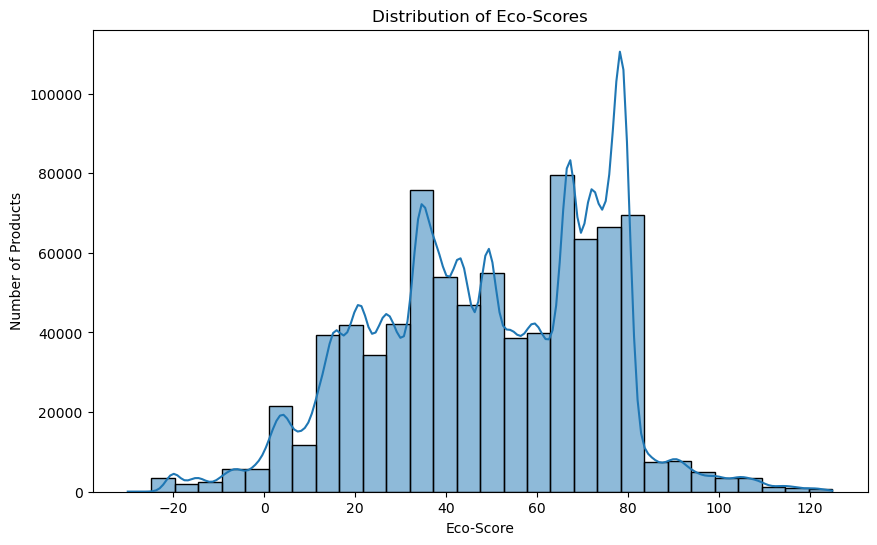

In [213]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df[df['ecoscore_score'] != -1], x='ecoscore_score', bins=30, kde = True)
plt.title('Distribution of Eco-Scores')
plt.xlabel('Eco-Score')
plt.ylabel('Number of Products')
plt.show()

The histogram above illustrates the distribution of Eco-Scores across our dataset. Notably, there's a wide spread in scores, with a noticeable concentration of products in the middle range, suggesting a moderate environmental impact. Peaks around scores of 40 and 80 indicate common score values, possibly reflecting standard industry practices. Additionally, the presence of scores below zero may indicate data irregularities or products with significantly adverse environmental impacts, warranting further investigation.

## Distribution of Eco-Scores Grades

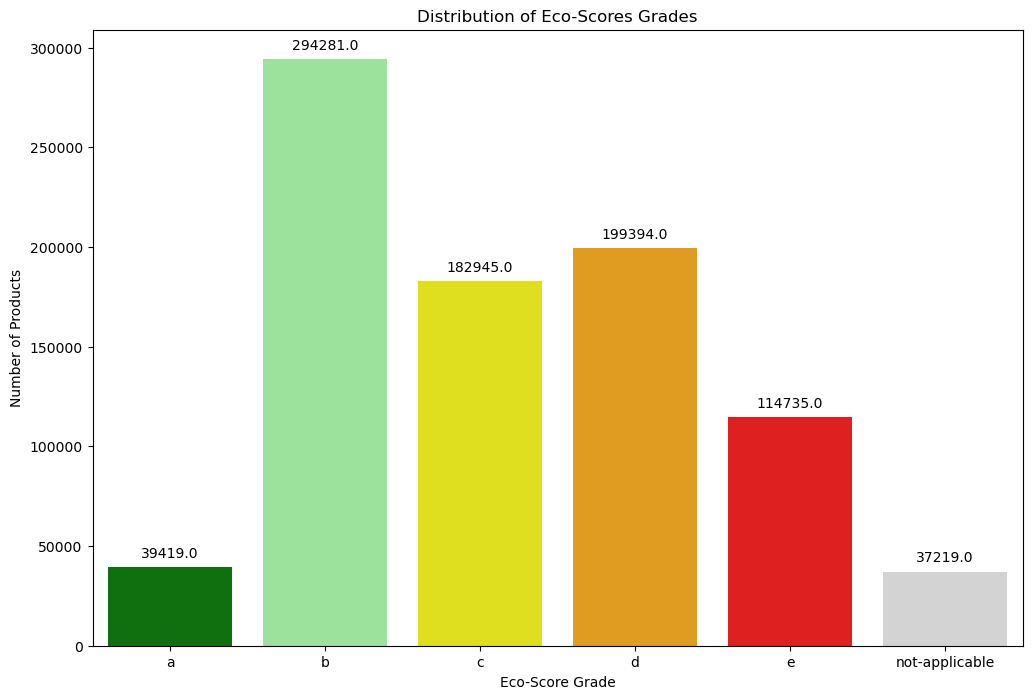

In [224]:
plt.figure(figsize=(12, 8))

eco_score_colors = ['green', 'lightgreen', 'yellow', 'orange', 'red', 'lightgrey']
palette_dict = dict(zip(['a', 'b', 'c', 'd', 'e', 'not-applicable'], eco_score_colors))

ax = sns.countplot(
    x='ecoscore_grade',
    data=df[df['ecoscore_grade'].isin(['a', 'b', 'c', 'd', 'e', 'not-applicable'])],
    order=['a', 'b', 'c', 'd', 'e', 'not-applicable'],
    hue='ecoscore_grade',
    palette=palette_dict,
    dodge=False,
    legend=False
)

plt.title('Distribution of Eco-Scores Grades')
plt.xlabel('Eco-Score Grade')
plt.ylabel('Number of Products')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

The bar chart presents the distribution of Eco-Score grades among our product dataset. The height of each bar signifies the quantity of products assigned to each Eco-Score grade, ranging from 'A' to 'E'. It is evident that grade 'B' represents the majority, indicating a higher prevalence of products with this Eco-Score. Grades 'A' and 'E' have the fewest products, suggesting fewer items with the best and worst environmental impacts, respectively.

##  Eco-Score Distribution across food groups

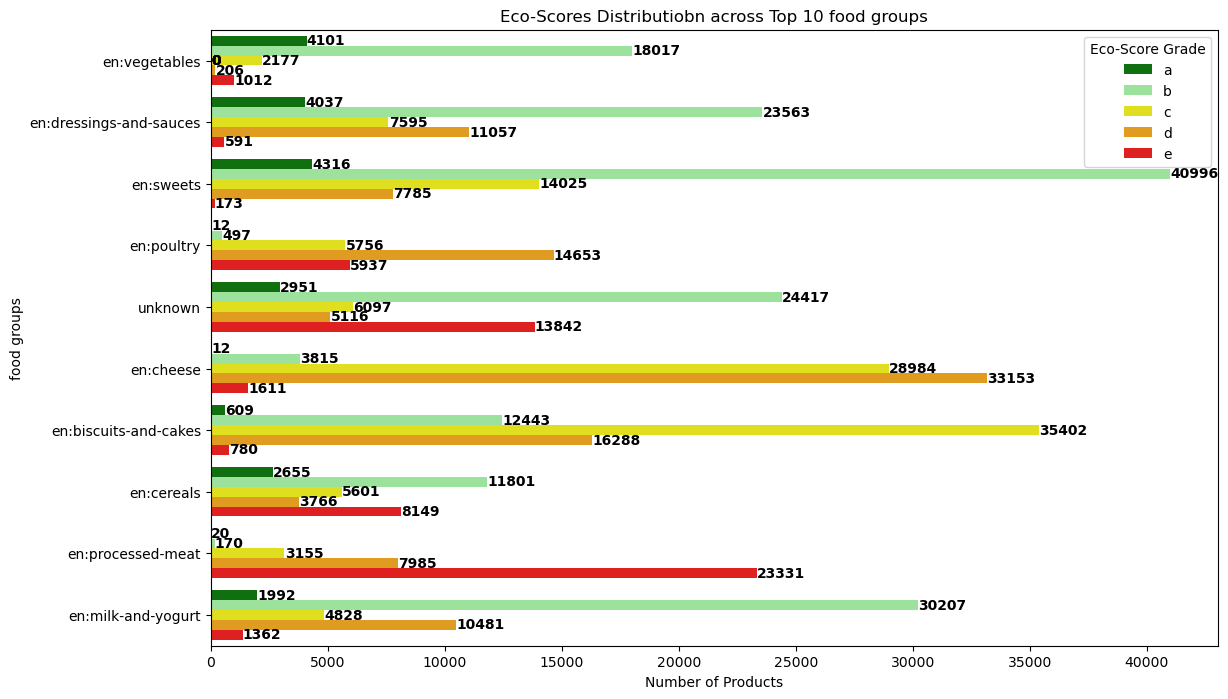

In [231]:
# Eco-Scores Distribution across Top 10 food groups
eco_score_colors = {'a': 'green', 'b': 'lightgreen', 'c': 'yellow', 'd': 'orange', 'e': 'red'}
top_food_groups = df[df['ecoscore_score'] != -1]['food_groups'].value_counts().head(10).index

plt.figure(figsize=(13, 8))
ax = sns.countplot(y='food_groups', hue='ecoscore_grade', data=df[(df['ecoscore_score'] != -1) & (df['food_groups'].isin(top_food_groups))],
                   hue_order=['a', 'b', 'c', 'd', 'e'], palette=eco_score_colors)

# Annotate each bar with its count
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_x() + width, p.get_y() + height / 2
    ax.annotate(f'{int(width)}', (x + 10, y), ha='left', va='center', color='black', weight='bold', fontsize=10)  # Increased fontsize

plt.title('Eco-Scores Distributiobn across Top 10 food groups')
plt.xlabel('Number of Products')
plt.ylabel('food groups')
plt.legend(title='Eco-Score Grade')
plt.show()

### Categories without Eco-Scores

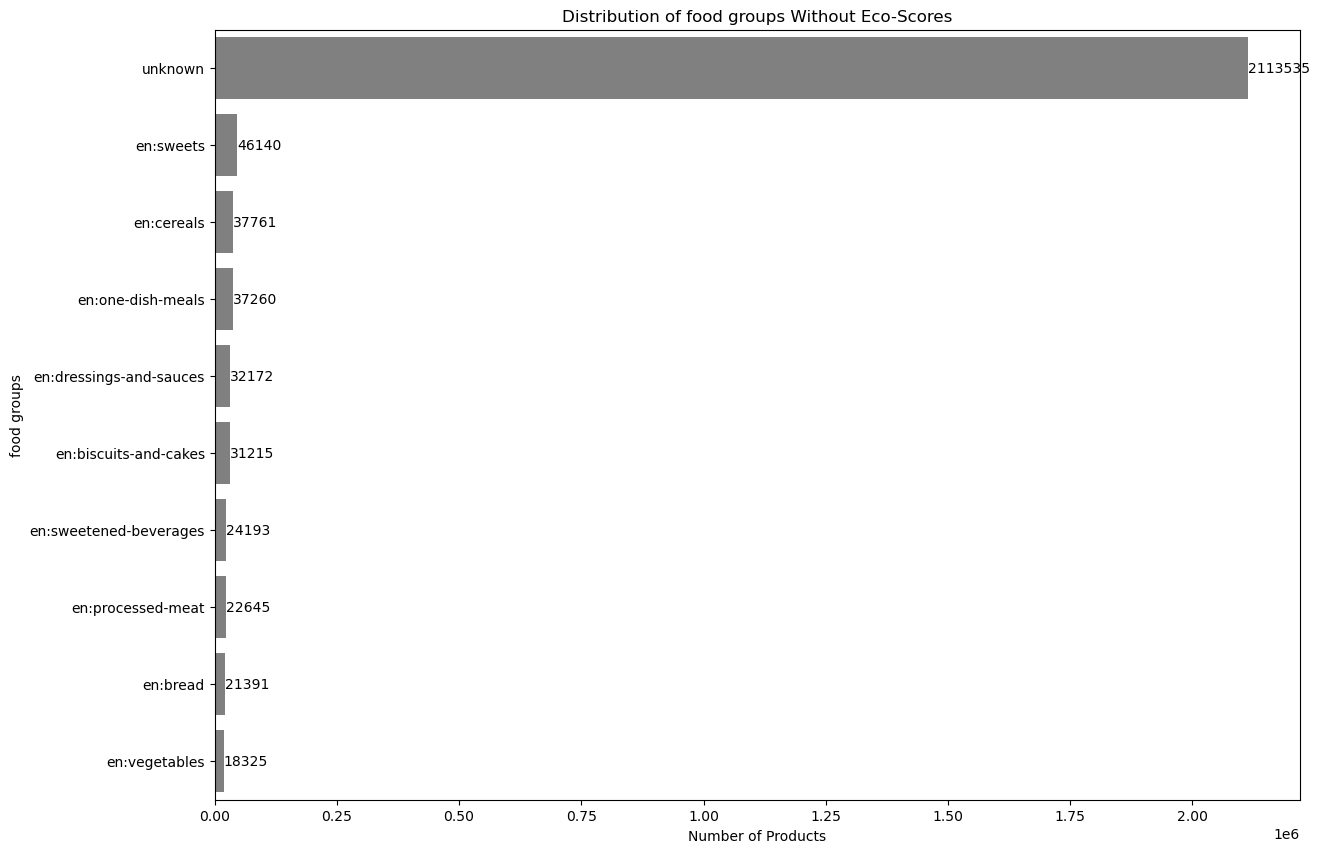

In [233]:
# Find food groups without Eco-Scores
food_groups_without_eco_scores = df[df['ecoscore_score'] == -1]['food_groups'].value_counts().head(10)

# Plotting the distribution of food groups without Eco-Scores
plt.figure(figsize=(14,10))
ax = sns.barplot(x=food_groups_without_eco_scores.values, y=food_groups_without_eco_scores.index, color='gray')
plt.title('Distribution of food groups Without Eco-Scores')
plt.xlabel('Number of Products')
plt.ylabel('food groups')

# Add annotations for each bar
for i, v in enumerate(food_groups_without_eco_scores.values):
    ax.text(v + 3, i, str(v), color='black', va='center')

plt.show()

The bar chart highlights food groups with products lacking Eco-Scores, with 'unknown' leading significantly. This indicates a large segment of products where environmental impact has not been assessed, notably in 'sweets' and 'cereals'. Understanding why these categories are underrepresented in Eco-Scores could provide insights into data gaps or product eligibility for environmental scoring.

## Total Number of Products With and Without categories

In [237]:
# Count products with and without categories data
with_categories = df[df['categories'] != 'unknown'].shape[0]  
without_categories = df[df['categories'] == 'unknown'].shape[0]
categories_percentage= (with_categories / total_products) * 100
no_categories_percentage= (without_categories / total_products) * 100


print(f"Products with categories data: {with_categories}")
print(f"Products without categories data: {without_categories}")
print(f"Percentage of products with categories: {categories_percentage:.2f}%")
print(f"Percentage of products without categories: {no_categories_percentage:.2f}%")

Products with categories data: 1475852
Products without categories data: 1885796
Percentage of products with categories: 43.90%
Percentage of products without categories: 56.10%


## Combining Eco-Score Analysis With categories

In [240]:
products_with_ecoscore = df[df['ecoscore_grade'].isin(['a', 'b', 'c', 'd', 'e'])]
with_categories_ecoscore = products_with_ecoscore[products_with_ecoscore['categories'] != 'unknown'].shape[0]
without_categories_ecoscore = products_with_ecoscore[products_with_ecoscore['categories'] == 'unknown'].shape[0]
categories_percentage_eco_score= (with_categories_ecoscore / total_products) * 100
no_categories_percentage_eco_score = (without_categories_ecoscore / total_products) * 100

print(f"Products with an Eco-Score and categories data: {with_categories_ecoscore}")
print(f"Products with an Eco-Score and without categories data: {without_categories_ecoscore}")
print(f"Percentage of products with an Eco-Score and categories data: {categories_percentage_eco_score:.2f}%")
print(f"Percentage of products with an Eco-Score and without categories data: {no_categories_percentage_eco_score:.2f}%")

Products with an Eco-Score and categories data: 830774
Products with an Eco-Score and without categories data: 0
Percentage of products with an Eco-Score and categories data: 24.71%
Percentage of products with an Eco-Score and without categories data: 0.00%


In [242]:
# Filter for products with unknown categories and retrieve the top 20
unknown_categories = df[(df['ecoscore_score'] == -1) & (df['food_groups'] == 'unknown')]
top_10_unknown_categories = unknown_categories['product_name'].head(20)

# Display the top 20 products with unknown categories
print(top_10_unknown_categories)

1                             andrè
2                           l.casei
4                  vitória crackers
5                             cacao
6         filetes de pollo empanado
7                 burger meat pollo
8      hamburguesas de ternera 100%
9          blueberry cobbler coffee
10                        hyde icon
12            sauce sweety chili 0%
13                        mini coco
14            pistou d'ail des ours
15             thé noir glacé pomme
16                        pain maïs
17                        mendiants
18    limonade artisanale a la rose
19                tablette tanzanie
22                 jus de framboise
24                        chocolats
26      fromage blanc aux myrtilles
Name: product_name, dtype: object


These products represent a diverse range of food items, and the challenge lies in categorising them accurately due to the lack of specific category information.

## Eco-Score Distribution across Brands

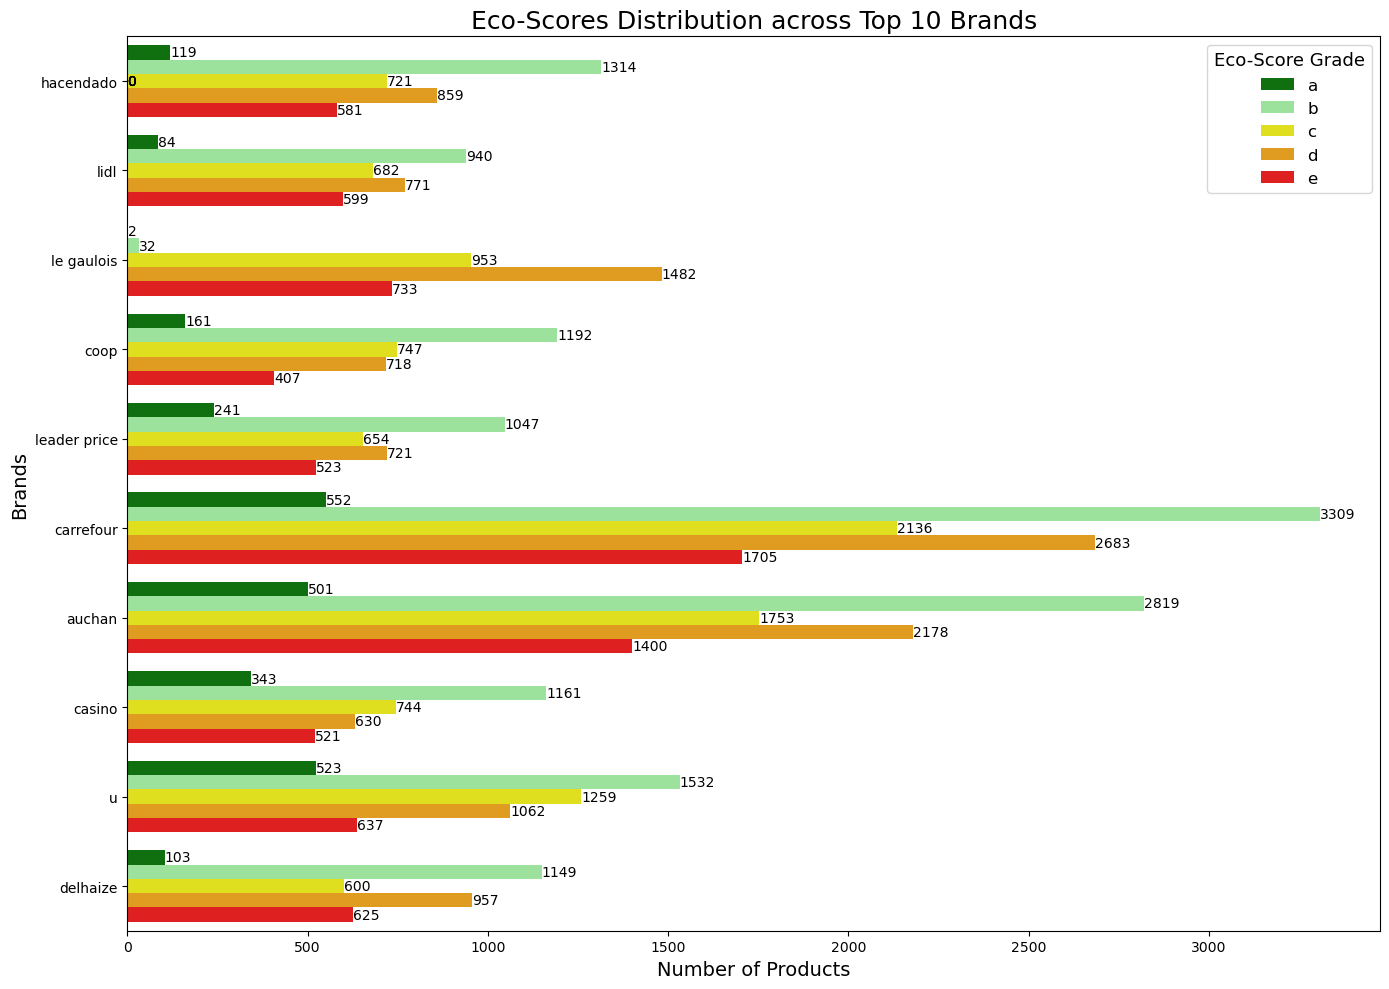

In [247]:
# Filter out products with unknown brands and unknown Eco-Scores
filtered_df = df[(df['ecoscore_score'] != -1) & ~(df['brands'].isin(['Unknown', 'unknown']))]

# Get the top 10 most common brands for products with known Eco-Scores
top_brands = filtered_df['brands'].value_counts().head(10).index
eco_score_colors = {'a': 'green', 'b': 'lightgreen', 'c': 'yellow', 'd': 'orange', 'e': 'red'}
plt.figure(figsize=(14, 10))  
ax = sns.countplot(y='brands', hue='ecoscore_grade', data=filtered_df[filtered_df['brands'].isin(top_brands)],
              hue_order=['a', 'b', 'c', 'd', 'e'], palette=eco_score_colors)

plt.title('Eco-Scores Distribution across Top 10 Brands', fontsize=18)
plt.xlabel('Number of Products', fontsize=14)
plt.ylabel('Brands', fontsize=14)
plt.legend(title='Eco-Score Grade', fontsize=12, title_fontsize='13')

# Add annotations for each bar
for p in ax.patches:
    width = p.get_width()
    plt.text(width, p.get_y() + p.get_height() / 2, f'{int(width)}', ha='left', va='center')

plt.tight_layout()
plt.show()

The bar chart provides a comparison of Eco-Score grades among the top 10 brands. Notably, there's a varied distribution of scores from 'A' to 'E' for each brand, with some showing a higher frequency of environmentally favorable scores ('A' and 'B'). 

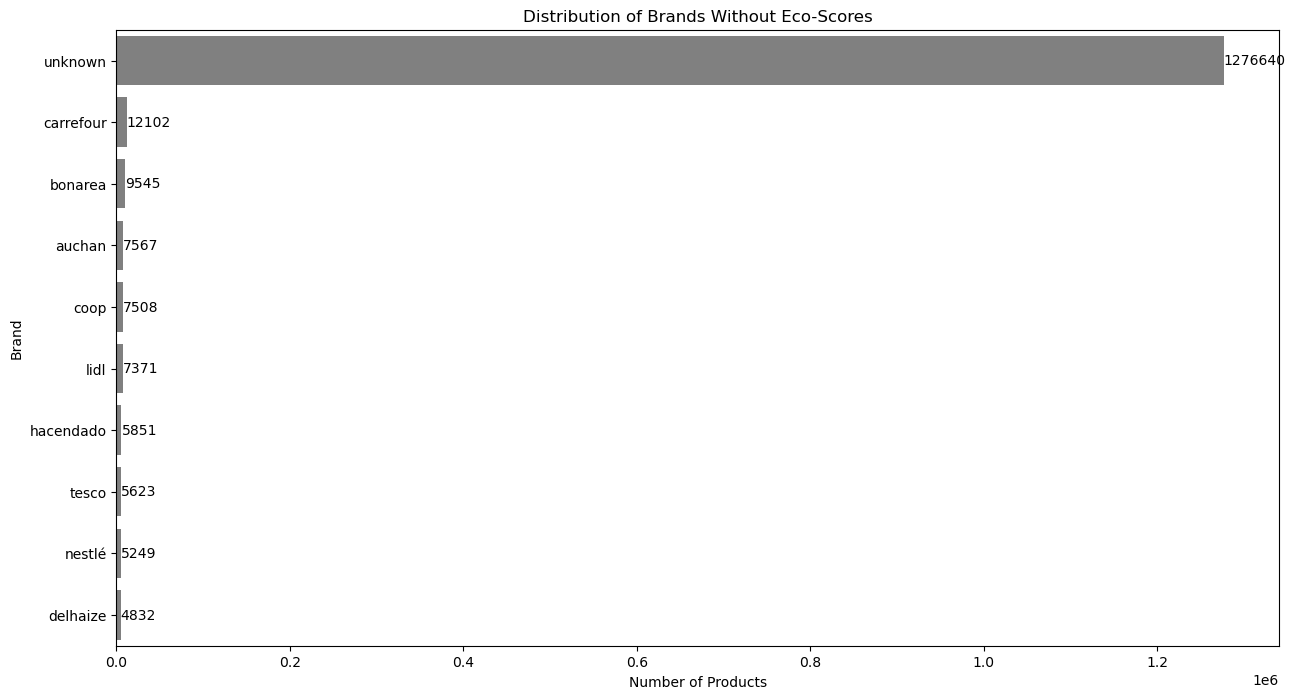

In [250]:
# Find categories without Eco-Scores
categories_without_eco_scores = df[df['ecoscore_score'] == -1]['brands'].value_counts().head(10)

# Plotting the distribution of brands without Eco-Scores
plt.figure(figsize=(15, 8))
ax = sns.barplot(x=categories_without_eco_scores.values, y=categories_without_eco_scores.index, color='gray')
plt.title('Distribution of Brands Without Eco-Scores')
plt.xlabel('Number of Products')
plt.ylabel('Brand')

# Add annotations for each bar
for p in ax.patches:
    width = p.get_width()
    plt.text(width, p.get_y() + p.get_height() / 2, f'{int(width)}', ha='left', va='center')

plt.show()

The bar chart illustrates the number of products by brand that are missing Eco-Scores. A significant portion labeled 'unknown' indicates products that have not been associated with a known brand or lack branding information. Among identified brands, 'carrefour', 'bonarea', 'auchan' and others, lead with the highest number of products without Eco-Scores.

## Total Number of Products With and Without brands

In [257]:
# Count products with and without brands data
with_brands = df[df['brands'] != 'unknown'].shape[0]  
without_brands = df[df['brands'] == 'unknown'].shape[0]
brands_percentage= (with_brands / total_products) * 100
no_brands_percentage= (without_brands / total_products) * 100


print(f"Products with brands data: {with_brands}")
print(f"Products without brands data: {without_brands}")
print(f"Percentage of products with brands: {brands_percentage:.2f}%")
print(f"Percentage of products without brands: {no_brands_percentage:.2f}%")

Products with brands data: 1888127
Products without brands data: 1473521
Percentage of products with brands: 56.17%
Percentage of products without brands: 43.83%


## Combining Eco-Score Analysis With brands

In [260]:
products_with_ecoscore = df[df['ecoscore_grade'].isin(['a', 'b', 'c', 'd', 'e'])]
with_brands_ecoscore = products_with_ecoscore[products_with_ecoscore['brands'] != 'unknown'].shape[0]
without_brands_ecoscore = products_with_ecoscore[products_with_ecoscore['brands'] == 'unknown'].shape[0]
brands_percentage_eco_score= (with_brands_ecoscore / total_products) * 100
no_brands_percentage_eco_score = (without_brands_ecoscore / total_products) * 100

print(f"Products with an Eco-Score and brands data: {with_brands_ecoscore}")
print(f"Products with an Eco-Score and without brands data: {without_brands_ecoscore}")
print(f"Percentage of products with an Eco-Score and brands data: {brands_percentage_eco_score:.2f}%")
print(f"Percentage of products with an Eco-Score and without brands data: {no_brands_percentage_eco_score:.2f}%")

Products with an Eco-Score and brands data: 633618
Products with an Eco-Score and without brands data: 197156
Percentage of products with an Eco-Score and brands data: 18.85%
Percentage of products with an Eco-Score and without brands data: 5.86%


## Analysis Results

After performing the calculations, we have discovered the following distribution of Eco-Scores:

- **Total number of products with an Eco-Score**: 829,801
- **Total number of products without an Eco-Score**: 2,531,847
- **Percentage of products with an Eco-Score**: 24.68%
- **Percentage of products without an Eco-Score**: 75.32%

The presence of Eco-Scores in over 24% of products suggests a fairly good awareness and integration of environmental considerations within the food industry. This can be seen as a positive step towards sustainability and provides a rich dataset for analysing the environmental practices of food producers and the ecological preferences of consumers.

However, the fact that 75.32% of products do not have an Eco-Score raises important considerations:
- **Data Collection and Reporting**: There's a clear opportunity to improve the collection and dissemination of environmental impact data.
- **Sustainability Efforts**: When many food products don't have Eco-Scores, it means there's a big chance for companies to do better in showing how they care for the environment and share their efforts to be more sustainable.
- **Market Trends**: If lots of products don't have Eco-Scores, it might mean that not all customers are asking for eco-friendly products yet. But this could change, and more companies might start making and advertising greener products in the future.

## Exploring ‘not-applicable’ Eco-Score Grades

One thing that caught my attention while looking at the dataset, was the ‘not-applicable’ field in the eco-scoregrade column.

In [280]:
df['ecoscore_grade'].values

array(['b', 'unknown', 'unknown', ..., 'unknown', 'unknown', 'unknown'],
      dtype=object)

Let’s first find out the total number of products with this field and its proportion in the dataset.

In [283]:
# Calculate the total number of products
total_products = len(df)

# Count the number of 'not-applicable' entries
not_applicable_count = (df['ecoscore_grade'] == 'not-applicable').sum()

# Calculate the proportion of 'not-applicable' entries
not_applicable_proportion = (not_applicable_count / total_products) * 100

# Display the results
print(f"Total number of products: {total_products}")
print(f"Number of 'not-applicable' products: {not_applicable_count}")
print(f"Proportion of 'not-applicable' products: {not_applicable_proportion:.2f}%")

Total number of products: 3361648
Number of 'not-applicable' products: 37219
Proportion of 'not-applicable' products: 1.11%


37,219 out of 3,361,648 products have a ‘not-applicable’ grade.

Next, we will see the top 10 categories with the most ‘not-applicable’ products as well as their brands.

In [289]:
# Filter the DataFrame to include only products with 'not-applicable' Eco-Scores
not_applicable_products = df[df['ecoscore_grade'] == 'not-applicable']

# Group by product categories and count the occurrences
not_applicable_by_category = not_applicable_products['categories'].value_counts()

# Display the top 10 categories with the most 'not-applicable' products
print(not_applicable_by_category.head(10))

categories
beverages, carbonated drinks, sodas                                               5230
beverages, waters                                                                 4181
beverages, energy drinks                                                           421
boissons, boissons énergisantes                                                    391
boissons, eaux, eaux de sources, eaux minérales, eaux minérales naturelles         383
boissons, boissons gazeuses, sodas                                                 377
boissons, eaux, eaux de sources, eaux minérales                                    330
boissons, eaux, eaux de sources                                                    300
bebidas, aguas, aguas de manantial, aguas minerales, aguas minerales naturales     298
getränke, kohlensäurehaltige getränke, erfrischungsgetränke                        282
Name: count, dtype: int64


In [291]:
# Filtered DataFrame for products with "not-applicable" Eco-Scores
df_not_applicable = df[df['ecoscore_grade'] == 'not-applicable'] 
# Group by brands
brands_not_applicable = df_not_applicable['brands'].value_counts()
print(brands_not_applicable.head(10))  

brands
unknown                   9026
coca-cola                  843
pepsi                      453
schweppes                  371
fanta                      345
red bull                   265
carrefour                  264
monster                    228
coca cola                  215
san pellegrino, nestlé     211
Name: count, dtype: int64


It was interesting to see how products with **‘not-applicable’** Eco-Scores were grouped within certain categories and brands.

The most frequent categories associated with **‘not-applicable’** Eco-Scores are related to beverages. There are a lot of carbonated drinks and beers at the top, followed by different kinds of water (mineral, spring, etc…).

Based on these results, it seems that the Eco-Score grades might be less applicable or challenging to apply for beverage products, possibly due to the nature of their production or packaging.

Furthermore, the brand analysis supports the category findings with popular brands like **Coca-Cola, Pepsi, Schweppes, Fanta** and **Red Bull** being among the products with ‘not-applicable’ scores.

## Conclusion


Clarifying why beverages often get **‘no-applicable’** scores is really important for both stakeholders and consumers, as it could help improve environmental impact assessments in this area.

The best thing to do is to get in touch with organisations responsible for Eco-Score assessments, as they can tell about the specific limitations or exclusions that apply to beverage products. Also, more research into the environmental impact of beverage production and packaging could show ways to improve data and make assessment practices more inclusive.